<a href="https://colab.research.google.com/github/danacioDS/AI-ML-SimpliLearn/blob/master/02_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K Means**

In [ ]:
import pandas as pd
import numpy as np

import sklearn 
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X, y_true = make_blobs(n_samples=300,
                       centers=4, cluster_std=0.6, 
                       shuffle=True, random_state=0)

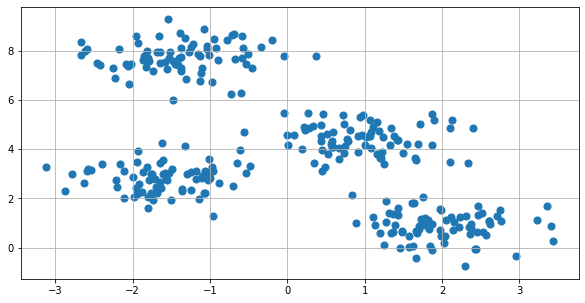

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(X[:,0], X[:,1], s=50);

In [ ]:
# Assign for clusters

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# Import library 

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):

# 1 randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]

  while True:
    # 2a. Assign Labels based on closets center
    labels = pairwise_distances_argmin(X, centers)



In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0], d

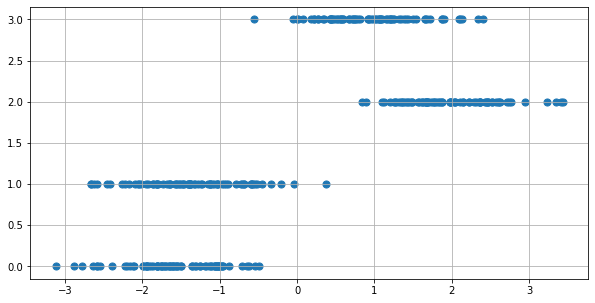

In [ ]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(X[:,0], y_kmeans,  s=50)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):

# 1 randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]

  while True:
    # 2a. Assign Labels based on closets center
    labels = pairwise_distances_argmin(X, centers)

    # 2b. Find the centers from means of points
    new_centers = np.array([X[labels == i].mean(0) 
    for i in range(n_clusters)])

    # 2c. Check for convergence

    if np.all(centers == new_centers):
      break
    centers = new_centers

  return centers, labels    

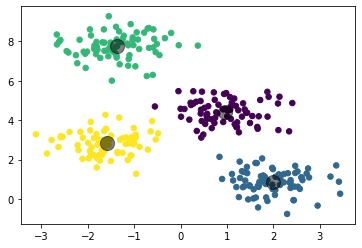

In [ ]:
centers, labels = find_clusters(X, 4)

colormap = plt.cm.viridis_r

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s=30, cmap=colormap)
plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5)

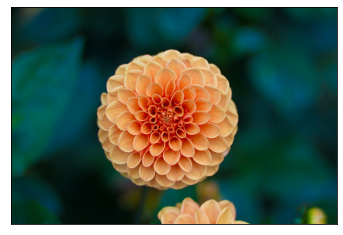

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);